In [1]:
# the Iris dataset is included in scikit-learn
from sklearn import datasets

In [2]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load dataset
iris = datasets.load_iris()

In [4]:
display(type(iris), iris.keys()) # DESCR provides a description of the dataset

sklearn.utils.Bunch

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# prep the data, EDA
X1 = iris.data
y1 = iris.target
df1 = pd.DataFrame(X1, columns=iris.feature_names)
display(df1.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


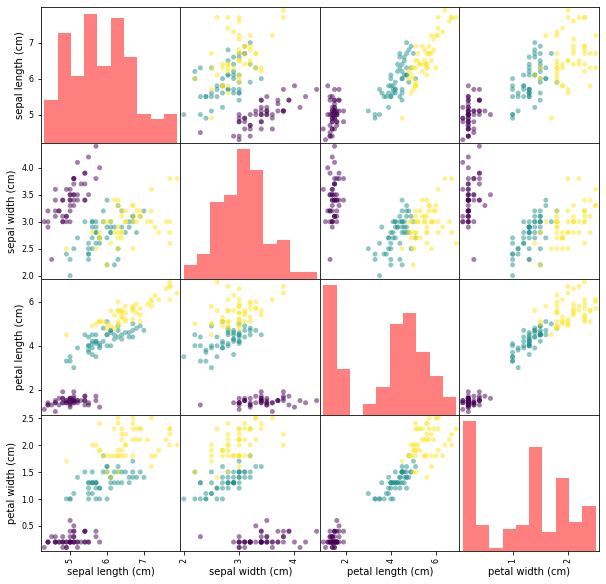

In [7]:
#visualize df colouring through target data
pd.plotting.scatter_matrix(df1, c=y1, figsize=[10,10], 
                           hist_kwds={'alpha':0.5,'color':['red']}, s=100) #s stands for the size of the marker
plt.show()

All machine learning models in scikit-learn are implemented as python classes. These classes implement the algorithms for learning a model, and predicting, while also storing all the information that is learned from the data. 

> **Training a model on the data is also called *fitting the model to the data***  

> `.fit()` for scikit-learn

> `.predict()` for scikit-learn to predict the lable of the new unlabeled data

### 1. K-nearest neighbors, or KNN

Algorithm to predict the label of any data point by looking at the K, *for example, 3*, closest labeled data points and getting them to vote on what label the unlabeled point should have.

The scikit-learn API requires:

* that you have the data as a **NumPy array** where each column is a feature and each row a different observation or data point.
* that the features take on continuous values, such as the price of a house, as opposed to categories, such as 'male' or 'female'. 
* that there are no missing values in the data. 

##### 1st example

In [8]:
# firstly, import the classifier/algorithm to predict
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# instantiate our KNeighborsClassifier, set the number of neighbors equal to 5, and assign it to the variable knn
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
#  make sure data and labels have the same number of observations
display(X1.shape, y1.shape)

(150, 4)

(150,)

In [11]:
# import function to split data for training and test the model
from sklearn.model_selection import train_test_split

# It is best practice to perform your split so that the split reflects the labels to be distributed in train and test sets 
# as they are in the original dataset. 

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=21, stratify=y1)
# To achieve this, we use the keyword argument stratify equals y, where y the list or array containing the labels. 

In [12]:
# fit this classifier to our training set, the labeled data
# data and labels as numpy arrays
knn.fit(X_train1, y_train1)
# make our predictions on the test data, store the results as y pred
y_pred = knn.predict(X_test1)

In [13]:
#check out the accuracy of our model
knn.score(X_test1, y_test1) 

0.9777777777777777

In [14]:
#unlabeled data
X_new1 = np.array([[6.6, 2.5, 3.9, 3.1],
                  [4.7, 2.6, 3.2, 1.3],       
                  [3.4, 3.2, 1.3, 1.2]])

In [15]:
#predict the lable of the 3 observations
knn.predict(X_new1)

array([2, 1, 0])

1. **overfitting**

complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data (that happens with a smaller k: increase K to avoid it)

2. **underfitting**

a simpler model will perform less well on both test and training sets (that happens with a larger k, with means a "smoother decision boundary": decrease K to avoid it)

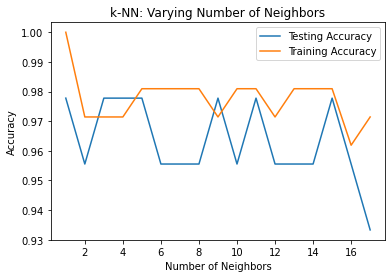

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 18)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train1, y_train1)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train1, y_train1)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test1, y_test1)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

***2nd example***

In [17]:
#load data with binary target
bc = datasets.load_breast_cancer()
display(bc.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
#prep data
X2 = bc.data
y2 = bc.target

#  make sure data and labels have the same number of observations
display(X2.shape, y2.shape)

(569, 30)

(569,)

In [19]:
# instantiate our KNeighborsClassifier, set the number of neighbors equal to 5, and assign it to the variable knn
knn2 = KNeighborsClassifier(n_neighbors=5)

In [20]:
#split dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=21, stratify=y2)

In [21]:
# fit this classifier to our training set, the labeled data
knn2.fit(X_train2, y_train2)
# make our predictions on the test data, store the results as y pred
y_pred2 = knn2.predict(X_test2)

In [22]:
#check out the accuracy of our model
knn2.score(X_test2, y_test2)

0.9239766081871345

In [23]:
# check more metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[ 55   9]
 [  4 103]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        64
           1       0.92      0.96      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



### 2. Logistic Regression 

* for binary classification
* regularization parameter: C.C controls the inverse of the regularization strength. A large  can lead to an overfit model, while a small  can lead to an underfit model.

In [24]:
# Import new module
from sklearn.linear_model import LogisticRegression

# Create training and test sets
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X2, y2, test_size = 0.3, random_state=21, stratify=y2)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_trainLR, y_trainLR)

# Predict the labels of the test set: y_pred
y_predLR = logreg.predict(X_testLR)

#check out the accuracy of our model
display(knn2.score(X_testLR, y_testLR))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_testLR, y_predLR))
print(classification_report(y_testLR, y_predLR))


C:\Users\bea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9239766081871345

[[ 58   6]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### ROC curve and Area under the ROC curve (AUC)

the larger the area under the ROC curve, the better the model is

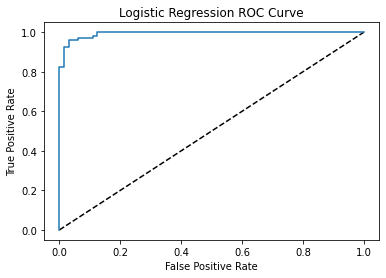

In [25]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_testLR)[:,1]
fpr, tpr, thresholds = roc_curve(y_testLR, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

```
# Import necessary modules
from sklearn.metrics import roc_auc_score  
from sklearn.model_selection import cross_val_score 

# Compute predicted probabilities: 
y_pred_probA = logreg.predict_proba(X_testLR)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_testLR, y_pred_probA)))

# Compute cross-validated AUC scores: 
cv_auc = cross_val_score(logreg, X2, y2, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
```

#### Hyperparameter tuning with GridSearchCV
Grid search Cross Validation should be performed on the training set

In [26]:
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 50)}
# Instantiate classifier
knnG = KNeighborsClassifier()
# Instantiate the GridSearchCV object  and fit it to the data
knn_cv = GridSearchCV(knnG, param_grid, cv=5)
knn_cv.fit(X1, y1)

display(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 6}

0.9800000000000001

```
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid2 = {'C': c_space}
# Instantiate a logistic regression classifier: 
logregG = LogisticRegression()
# Instantiate the GridSearchCV object: 
logreg_cv = GridSearchCV(logregG, param_grid2, cv=5)

# Fit it to the data
logreg_cv.fit(X2, y2)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
```

### Hyperparameter tuning with RandomizedSearchCV
a fixed number of hyperparameter settings is sampled from specified probability distributions (to lower computational cost)
> It will never outperform `GridSearchCV`. Instead, it is valuable because it saves on computation time.

```
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X1, y1)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
```

#### use pipelanes and scale

In [28]:
#imports 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StardardScaler

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X1,y1,test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=4)

# Fit to the training set
cv.fit(X_trainP,y_trainP)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_testP)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

ImportError: cannot import name 'StardardScaler' from 'sklearn.preprocessing' (C:\Users\bea\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)